In [1]:
# Homework 05
# Vance Nygard's solutions.
## Due Tuesday, March 29th

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import shapely.geometry
import shapely.ops

from scipy import spatial
from mpl_toolkits.basemap import Basemap

from scipy import interpolate


List of States Seen En Route: ['Alaska' 'California' 'Colorado' 'Delaware' 'District of Columbia'
 'Florida' 'Georgia' 'Louisiana' 'Maryland' 'North Carolina' 'Texas'
 'Virginia']


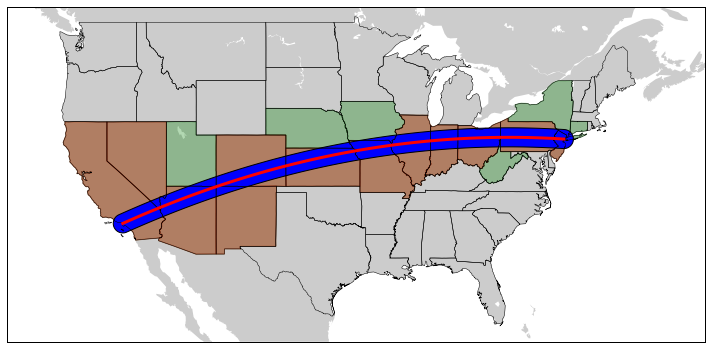

In [54]:
##Problem 1
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111) 
m = Basemap(llcrnrlon=-130.,llcrnrlat=23.5,
        urcrnrlon=-60.,urcrnrlat=50.,
        rsphere=(6378137.00,6356752.3142),
        resolution='l',projection='merc',
        lat_0=40.,lon_0=-100.,lat_ts=20.)
ax = fig.add_subplot(111)
m.fillcontinents();
m.readshapefile('states_21basic/states', 'states');


latLAX = 33.9425
lonLAX = -118.4081
latEWR = 40.6925
lonEWR = -74.1686

pathx, pathy = m.gcpoints(lonLAX, latLAX, lonEWR, latEWR, 120)
ax.plot(pathx,pathy)

states = shapely.ops.linemerge(m.states)
line = shapely.geometry.LineString(zip(pathx, pathy))
dialated = line.buffer(100000)
seen = []

for i, poly in enumerate(states):
    if poly.intersects(dialated):
        color = 'green'
        seen.append(m.states_info[i]['STATE_NAME'])
    else:
#         color = 'k'
        continue
    coords = shapely.ops.cascaded_union(poly).coords[:]
    x, y = zip(*coords)
    plt.fill(x, y, color=color, alpha=0.3)
    
for i, poly in enumerate(states):
    if poly.intersects(line):
        color = 'r'
        seen.append(m.states_info[i]['STATE_NAME'])
    else:
#         color = 'k'
        continue
    coords = shapely.ops.cascaded_union(poly).coords[:]
    x, y = zip(*coords)
    plt.fill(x, y, color=color, alpha=0.3)
    
x, y = zip(*line.coords[:])
plt.plot(x, y, '-r', lw = 3)
plt.fill(*dialated.boundary.xy)#, alpha=0.2)
plt.gca().set_aspect(1.0)
print "List of States Seen En Route:", np.unique(seen)

0.986090261784  is the fraction at least 0.001 units away from edges
0.865253615351  is the fraction at least 0.01 units away from edges
0.0924424566394  is the fraction at least 0.1 units away from edges


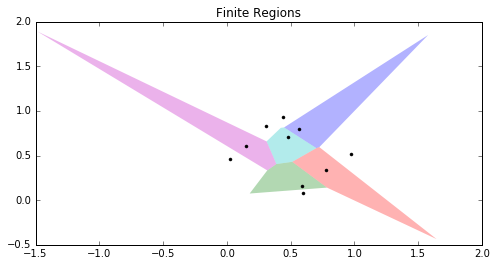

In [228]:
##Problem 2
arr = np.array([[ 0.77354201,  0.34072038],
                [ 0.43807549,  0.93001924],
                [ 0.5624092 ,  0.79438991],
                [ 0.02536295,  0.46180244],
                [ 0.59533179,  0.07522803],
                [ 0.47867418,  0.70302822],
                [ 0.30371564,  0.83135442],
                [ 0.5856915 ,  0.16340903],
                [ 0.14700491,  0.60268997],
                [ 0.97098631,  0.51692456]])

vor = spatial.Voronoi(arr)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)  
ax.set_title('Finite Regions')
plt.plot(arr[:, 0], arr[:, 1], '.k')

area = 0
area_001 = 0
area_01 = 0
area_1 = 0

for indices in vor.regions:
    if not indices: continue     # empties
    if -1 in indices: continue   # regions extending beyond diagram
    plt.fill(vor.vertices[indices, 0], vor.vertices[indices, 1], edgecolor='none', alpha=0.3)
    xy = zip(vor.vertices[indices, 0], vor.vertices[indices, 1])
    area = area + shapely.geometry.Polygon(xy).area
    area_001 += shapely.geometry.Polygon(xy).buffer(-0.001).area
    area_01 += shapely.geometry.Polygon(xy).buffer(-0.01).area
    area_1 += shapely.geometry.Polygon(xy).buffer(-0.1).area

print area_001/area , " is the fraction at least 0.001 units away from edges."
print area_01/area , " is the fraction at least 0.01 units away from edges."
print area_1/area , " is the fraction at least 0.1 units away from edges."

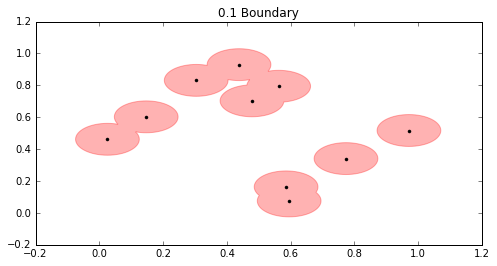

In [231]:
# IGNORE THIS CELL FOR GRADING PURPOSES #
#Problem 2 - test case
points_1 = shapely.geometry.MultiPoint(arr).buffer(0.1)
regions_1 = shapely.ops.linemerge(points_1.boundary)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)  
ax.set_title('0.1 Boundary')
plt.plot(arr[:, 0], arr[:, 1], '.k')

for poly in regions_1:
    color = 'r'
    
    coords = shapely.ops.cascaded_union(poly).coords[:]
    x, y = zip(*coords)
    plt.fill(x, y, color=color, alpha=0.3)
# IGNORE THIS CELL FOR GRADING PURPOSES #

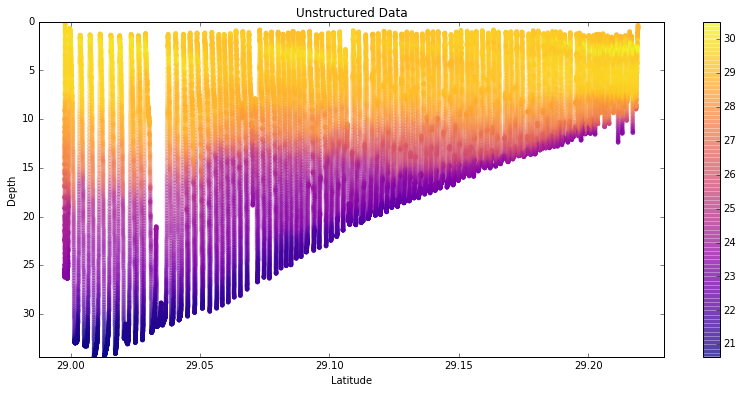

In [169]:
#Problem 3.

file  = '../python4geosciences/data/MS03_L15.txt'
data = np.loadtxt(file,comments='*')
lat = data[:,0]
dep = data[:,2]
temp = data[:,3]

fig, ax = plt.subplots(1,1,figsize=(14,6))
mappable = ax.scatter(lat, dep, c=temp, cmap = 'plasma', edgecolors = 'none', alpha=0.5)
ax.set_xlim(np.min(lat)-0.01, np.max(lat)+0.01)
ax.set_xlabel('Latitude')
ax.set_ylim(np.min(dep), np.max(dep))
ax.set_ylabel('Depth')
ax.invert_yaxis()
ax.set_title('Unstructured Data')
fig.colorbar(mappable)

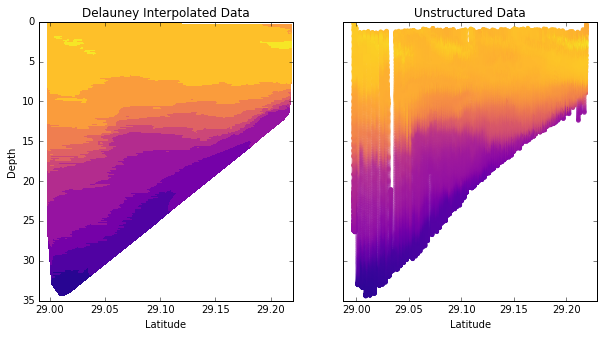

In [171]:
#Problem 3, Continued.

bounds = np.linspace(20,31, 12)

tri = spatial.Delaunay(zip(lat,dep))
interp = interpolate.LinearNDInterpolator(tri, temp)

ygrid, zgrid = np.mgrid[0:35:350j, 28.99:29.22:2300j]
tgrid = interp(zgrid, ygrid)

tgrid = np.ma.masked_where(np.isnan(tgrid), tgrid)

fig, axs = plt.subplots(1, 2,  sharey = True, figsize=(10, 5))
mappable1 = axs[0].contourf(zgrid, ygrid, tgrid, cmap='plasma',levels = bounds, vmin = 20, vmax = 31)
axs[0].invert_yaxis()
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Depth')
axs[0].set_title('Delauney Interpolated Data')

mappable2 = axs[1].scatter(lat, dep, c=temp, cmap = 'plasma', edgecolors = 'none', alpha=0.5, vmin = 20, vmax =31)
axs[1].set_xlim(np.min(lat)-0.01, np.max(lat)+0.01)
axs[1].set_xlabel('Latitude')
axs[1].set_ylim(np.min(dep), 35)
axs[1].invert_yaxis()
axs[1].set_title('Unstructured Data')
# fig.colorbar(mappable2, orientation = 'horizontal')


In [29]:
#Problem 4
m1 = Basemap(projection='merc',llcrnrlat=-40,urcrnrlat=84,\
            llcrnrlon=-75,urcrnrlon=155,lat_ts=20,resolution='c')
m2 = Basemap(projection='robin',lon_0=50,resolution='c')
m3 = Basemap(projection='moll',lon_0=50,resolution='c')

m1.readshapefile('../python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m1.readshapefile('../python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

m2.readshapefile('../python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m2.readshapefile('../python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

m3.readshapefile('../python4geosciences/data/GRL_adm_shp/GRL_adm0', 'greenland', drawbounds=False)
m3.readshapefile('../python4geosciences/data/AUS_adm_shp/AUS_adm0', 'australia', drawbounds=False)

(1,
 5,
 [112.91972351074276, -55.11694335937477, 0.0, 0.0],
 [159.25608825683616, -9.221098899841202, 0.0, 0.0])

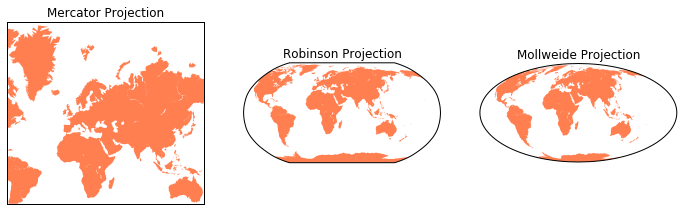

In [51]:
# Problem 4, Continued
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)  
m1.fillcontinents(color = 'coral')
ax.set_title('Mercator Projection')

ax2 = fig.add_subplot(132) 
m2.fillcontinents(color = 'coral')
ax2.set_title('Robinson Projection')

ax3 = fig.add_subplot(133)  
m3.fillcontinents(color = 'coral')
ax3.set_title('Mollweide Projection')

In [45]:
#Problem 4: Mercator Areas
m1g_area = 0
m1a_area = 0
for i in range(len(m1.greenland)):
    poly = shapely.geometry.Polygon(m1.greenland[i])
    m1g_area = m1g_area+ poly.area
for i in range(len(m1.australia)):
    poly = shapely.geometry.Polygon(m1.australia[i])
    m1a_area = m1a_area+ poly.area
    
print "Greenland Area: ", m1g_area
print "Australia Area: ", m1a_area

Greenland Area:  3.07893553718e+13
Australia Area:  8.50123531069e+12


In [46]:
#Problem 4: Robinson Areas
m2g_area = 0
m2a_area = 0
for i in range(len(m2.greenland)):
    poly = shapely.geometry.Polygon(m2.greenland[i])
    m2g_area = m2g_area+ poly.area
for i in range(len(m1.australia)):
    poly = shapely.geometry.Polygon(m2.australia[i])
    m2a_area = m2a_area+ poly.area
    
print "Greenland Area: ", m2g_area
print "Australia Area: ", m2a_area

Greenland Area:  3.42307733066e+12
Australia Area:  6.79169052248e+12


In [47]:
#Problem 4: Mollweide Areas
m3g_area = 0
m3a_area = 0
for i in range(len(m3.greenland)):
    poly = shapely.geometry.Polygon(m3.greenland[i])
    m3g_area = m3g_area+ poly.area
for i in range(len(m3.australia)):
    poly = shapely.geometry.Polygon(m3.australia[i])
    m3a_area = m3a_area+ poly.area
    
print "Greenland Area: ", m3g_area
print "Australia Area: ", m3a_area

Greenland Area:  2.13444085752e+12
Australia Area:  7.699609269e+12


In [50]:
#Real World Ratios (Taken from the CIA World Factbook: https://www.cia.gov/library/publications/the-world-factbook/)
Greenland = 2.166e+12
Australia = 7.682e+12
print "Real World A:G Ratio: ", Australia/Greenland

#Mercator
print "Mercator Projection A:G Ratio: ", m1a_area/m1g_area

#Robinson
print "Robinson Projection A:G Ratio: ", m2a_area/m2g_area

#Mollweide
print "Mollweide Projection A:G Ratio: ", m3a_area/m3g_area

Real World A:G Ratio:  3.54662973223
Mercator Projection A:G Ratio:  0.276109558255
Robinson Projection A:G Ratio:  1.98408912988
Mollweide Projection A:G Ratio:  3.60731909806
